# Apps and Reviews

In [2]:
import pandas as pd
apps_with_duplicates = pd.read_csv("The Android App Market On Google Play.csv")
apps = apps_with_duplicates.drop_duplicates(keep=False)
print('Total number of apps in the dataset = ', apps.shape[0])
print(apps.sample(10))

Total number of apps in the dataset =  9948
                                App         Category  Rating Reviews  \
8376                   The DG Buddy         BUSINESS     3.7       3   
4766        Theme for Iphone X Plus  PERSONALIZATION     4.0     126   
4646      U Pull It Auto Dismantler         BUSINESS     3.1      71   
7469          Brainf*ck Interpreter           FAMILY     4.0      24   
8889           Soccer Board Tactics           SPORTS     4.1    6231   
3432  Tropical Beach Live Wallpaper  PERSONALIZATION     4.0   11343   
2023                Candy Pop Story           FAMILY     4.7   12948   
4241     Textgram - write on photos   ART_AND_DESIGN     4.4  295237   
2086             Sago Mini Big City           FAMILY     4.2       8   
3709                 Casper Ssinema    VIDEO_PLAYERS     3.3    1261   

                    Size     Installs  Type  Price Content Rating  \
8376                 11M          10+  Paid  $2.49       Everyone   
4766                8.0M 

# Cleaning

In [3]:
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs","Price"]
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9948 non-null   object 
 1   Category        9948 non-null   object 
 2   Rating          8491 non-null   float64
 3   Reviews         9948 non-null   object 
 4   Size            9948 non-null   object 
 5   Installs        9948 non-null   object 
 6   Type            9947 non-null   object 
 7   Price           9948 non-null   object 
 8   Content Rating  9947 non-null   object 
 9   Genres          9948 non-null   object 
 10  Last Updated    9948 non-null   object 
 11  Current Ver     9940 non-null   object 
 12  Android Ver     9945 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


c:\users\91855\desktop\sunny\python 3.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# App Categories

In [5]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps.Category.unique())
print('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]
plotly.offline.iplot(data)

Number of categories =  34


# App Rating 

In [6]:
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.186032269461783


# Size and Price of App

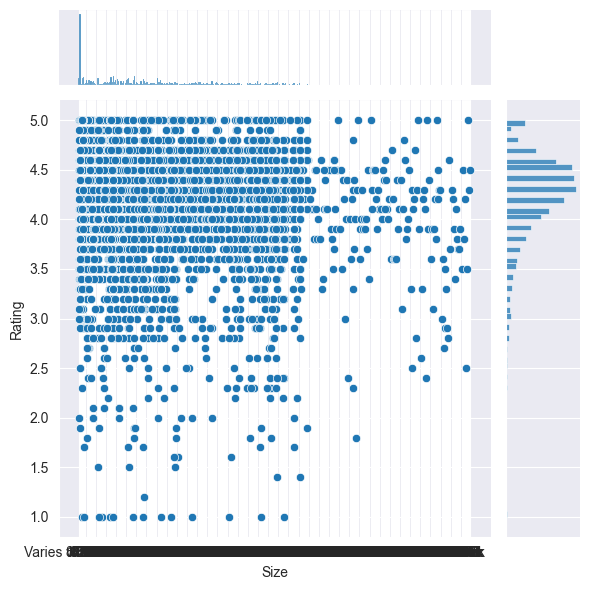

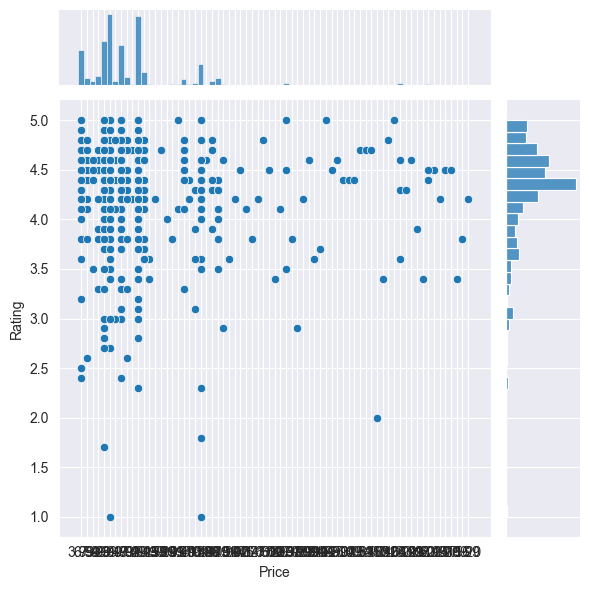

In [9]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)


plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# Paid App VS Free App

In [12]:
trace0 = go.Box(
   
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)
trace1 = go.Box(
    
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})